In [69]:
import scipy.optimize as opt
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
np.random.seed(42)


In [70]:
def cube_func(x):
    return x**3

def abs_func(x):
    return abs(x-0.2)

def sin_x_func(x):
    return x * np.sin(1/x)

eps = 1e-3

In [71]:
def search(left, right, eps, func):
    x = np.linspace(left, right, int((right-left)/eps) + 1)
    values = np.array(list(map(func, x)))
    min = np.argmin(values)
    arg = x[min]
    min_value = func(arg)
    func_calls = int((right-left)/eps) + 1
    iters = func_calls
    return arg, min_value, iters, func_calls

print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*search(0, 1, eps, cube_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*search(0, 1, eps, abs_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*search(0.01, 1, eps, sin_x_func)))

arg = 0.0000, min value = 0.0000, # iters = 1001, # function calls = 1001
arg = 0.2000, min value = 0.0000, # iters = 1001, # function calls = 1001
arg = 0.2230, min value = -0.2172, # iters = 991, # function calls = 991


In [72]:
def dichotomy(left, right, eps, func):
    delta = eps / 2
    iters = 0
    func_calls = 1
    x1 = (left + right - delta ) / 2
    x2 = (left + right + delta ) / 2
    while abs(left - right) > eps:
        if func(x1) <= func(x2):
            right = x2
        else:
            left = x1
        x1 = (left + right - delta ) / 2
        x2 = (left + right + delta ) / 2
        iters += 1
        func_calls += 1
    arg = (x1 + x2) /2
    min_value = func(arg)
    return arg, min_value, iters, func_calls

print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*dichotomy(0, 1, eps, cube_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*dichotomy(0, 1, eps, abs_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*dichotomy(0.01, 1, eps, sin_x_func)))
    

arg = 0.0005, min value = 0.0000, # iters = 11, # function calls = 12
arg = 0.2001, min value = 0.0001, # iters = 11, # function calls = 12
arg = 0.2226, min value = -0.2172, # iters = 11, # function calls = 12


In [73]:
def golden_section(left, right, eps, func):
    x1 = left + (3 - 5**0.5)/2 * (right - left)
    x2 = right + (5**0.5 - 3)/2 * (right - left)
    iters = 0
    while abs(left - right) > eps:
        if func(x1) <= func(x2):
            right = x2
            x2 = x1
            x1 = left + (3 - 5**0.5)/2 * (right - left)

        else:
            left = x1
            x1 = x2
            x2 = right + (5**0.5 - 3)/2 * (right - left)

        iters += 1
    func_calls = iters + 1
    arg = (x1 + x2) / 2
    min_value = func(arg)
    return arg, min_value, iters, func_calls


print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(
    *golden_section(0, 1, eps, cube_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(
    *golden_section(0, 1, eps, abs_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(
    *golden_section(0.01, 1, eps, sin_x_func)))


arg = 0.0004, min value = 0.0000, # iters = 15, # function calls = 16
arg = 0.2001, min value = 0.0001, # iters = 15, # function calls = 16
arg = 0.2227, min value = -0.2172, # iters = 15, # function calls = 16


In [74]:
alpha = np.random.rand(1)
beta = np.random.rand(1)
alpha, beta

x = np.linspace(0, 1, 101)
yk = alpha * x + beta 
yk_noisy = yk + np.random.randn(101)


In [75]:
def linear_approx(x, a, b):
    def linear(x, a, b):
        return a*x + b
    return np.array(list(map(partial(linear, a=a, b=b), x)))


def rational_approx(x, a, b):
    def rational(x, a, b):
        denominator = 1 + x * b
        return a / denominator
    return np.array(list(map(partial(rational, a=a, b=b), x)))


def cost_func(params, gt, x, func_name):
    a, b = params
    if func_name == 'linear':
        return sum((gt - linear_approx(x, a, b))**2)

    value = sum((gt - rational_approx(x, a, b))**2)
    return value


In [76]:
res_search_linear = opt.brute(cost_func, [[0, 1], [0, 1]], args=(yk, x, 'linear'), Ns=int(1/eps) + 1)

res_gauss_linear = opt.minimize(cost_func, [0, 0], args=(yk, x, 'linear'), tol=eps, method='Powell')
res_nelder_mead_linear = opt.minimize(cost_func, [0, 0], args=(yk, x, 'linear'), tol=eps, method='Nelder-Mead')

print(res_search_linear)
print('*' * 80)
print(res_gauss_linear)
print('*' * 80)
print(res_nelder_mead_linear)


[0.37457356 0.95069821]
********************************************************************************
   direc: array([[ 0.        ,  1.        ],
       [-1.04872929,  0.52436465]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 3
  status: 0
 success: True
       x: array([0.37454012, 0.95071431])
********************************************************************************
 final_simplex: (array([[0.37488366, 0.95065805],
       [0.37415517, 0.95079025],
       [0.37485029, 0.95032093]]), array([2.36087365e-06, 2.64386237e-06, 6.56096186e-06]))
           fun: 2.3608736471050557e-06
       message: 'Optimization terminated successfully.'
          nfev: 106
           nit: 54
        status: 0
       success: True
             x: array([0.37488366, 0.95065805])


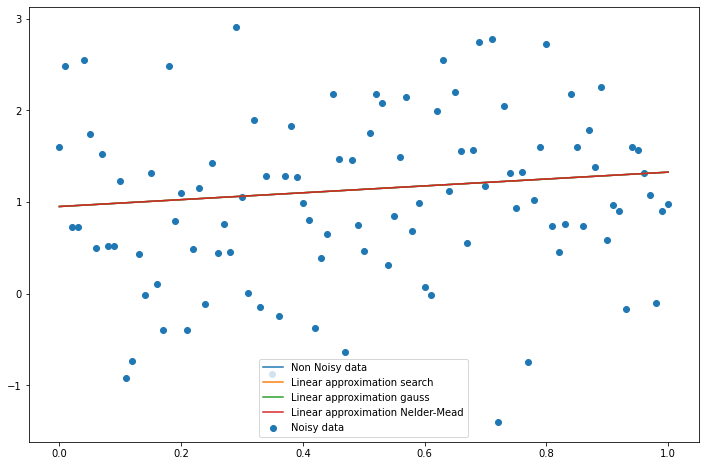

In [98]:
plt.figure(figsize=(12, 8))
plt.plot(x, yk)
plt.plot(x, linear_approx(x, *res_search_linear))
plt.plot(x, linear_approx(x, *res_gauss_linear.x))
plt.plot(x, linear_approx(x, *res_nelder_mead_linear.x))
plt.scatter(x, yk_noisy)
plt.legend(['Non Noisy data', 'Linear approximation search',
           'Linear approximation gauss', 'Linear approximation Nelder-Mead', 'Noisy data'])
plt.show()

In [92]:
res_search_rational = opt.brute(cost_func, [[0, 1], [0, 1]], args=(yk, x, 'rational'), Ns=int(1/eps) + 1)
res_gauss_rational = opt.minimize(cost_func, [0, 0], args=(yk, x, 'rational'), method='Powell', tol=eps, bounds=[[-1, 1], [-1, 1]])
res_nelder_mead_rational = opt.minimize(cost_func, [0, 0], args=(yk, x, 'rational'), method='Nelder-Mead', tol=eps, bounds=[[-1, 1], [-1, 1]])

print(res_search_rational)
print('*' * 80)
print(res_gauss_rational)
print('*' * 80)
print(res_nelder_mead_rational)


[ 0.97147445 -0.27744462]
********************************************************************************
   direc: array([[ 0.        ,  1.        ],
       [-0.02069026, -0.02401838]])
     fun: 0.008671313277411382
 message: 'Optimization terminated successfully.'
    nfev: 111
     nit: 4
  status: 0
 success: True
       x: array([ 0.97148749, -0.27745008])
********************************************************************************
 final_simplex: (array([[ 0.97178375, -0.27708776],
       [ 0.97116575, -0.27763086],
       [ 0.97129078, -0.27787315]]), array([0.00867447, 0.00867692, 0.00867704]))
           fun: 0.008674474624641229
       message: 'Optimization terminated successfully.'
          nfev: 123
           nit: 64
        status: 0
       success: True
             x: array([ 0.97178375, -0.27708776])


C:\Users\morko\AppData\Local\Temp/ipykernel_21860/485214572.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return a / denominator


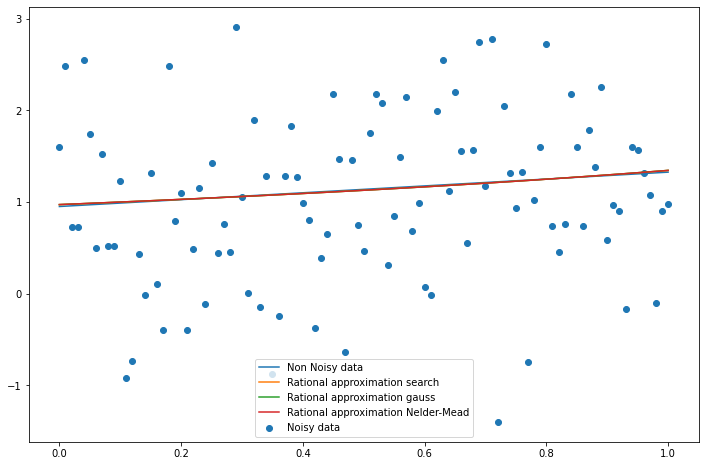

In [97]:
plt.figure(figsize=(12, 8))
plt.plot(x, yk)
plt.scatter(x, yk_noisy)
plt.plot(x, rational_approx(x, *res_search_rational))
plt.plot(x, rational_approx(x, *res_gauss_rational.x))
plt.plot(x, rational_approx(x, *res_nelder_mead_rational.x))
plt.legend(['Non Noisy data', 'Rational approximation search',
           'Rational approximation gauss', 'Rational approximation Nelder-Mead', 'Noisy data'])
plt.show()